In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.__version__

'1.3.4'

**Séries:** consiste em um array unidimensional de dados indexados

In [2]:
array = np.array([0.25, 0.5, 0.75, 1]) # array

series1 = pd.Series([0.25, 0.5, 0.75, 1],
                    index = ['a', 'b', 'c', 'd'],
                    name = 'Série a partir de lista') # lista

series2 = pd.Series((0.25, 0.5, 0.75, 1),
                   index = ['e', 'f', 'g', 'h'],
                   name = 'Série a partir de tupla') # tupla

series3 = pd.Series(array,
                   index = ['i', 'j', 'k', 'l'],
                   name = 'Série a partir de array')

In [3]:
series1

a    0.25
b    0.50
c    0.75
d    1.00
Name: Série a partir de lista, dtype: float64

In [4]:
series2

e    0.25
f    0.50
g    0.75
h    1.00
Name: Série a partir de tupla, dtype: float64

In [5]:
series3

i    0.25
j    0.50
k    0.75
l    1.00
Name: Série a partir de array, dtype: float64

In [6]:
# índices da série
series1.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [7]:
# nome da série
series2.name

'Série a partir de tupla'

In [8]:
# valores (dados em formato array) da série
series3.values

array([0.25, 0.5 , 0.75, 1.  ])

In [9]:
# tipo da série
series1.dtype

dtype('float64')

In [10]:
# forma (n-dimensional) da série
series2.shape

(4,)

In [11]:
# tamanho da série
series3.size

4

**Exercício**

Represente a gráfico abaixo como uma série, na qual os paises são os índices e os casos são os dados.

<img src="http://cdn.statcdn.com/Infographic/images/normal/21176.jpeg" width=300 height=600/>

In [13]:
countries = ["Belgium", "Israel", "Czechia", "Panama", "Kuwait",
             "United States", "Peru", "Chile", "Argentina", "Spain"]

cases = [39_166, 35_572, 33_103, 32_300, 30_957,
        28_414, 28_213, 27_455, 26_593, 26_554]

covid19 = pd.Series(cases, index = countries,
                   name = "Where COVID Talliers Are Highest Relative to Population")

covid19

Belgium          39166
Israel           35572
Czechia          33103
Panama           32300
Kuwait           30957
United States    28414
Peru             28213
Chile            27455
Argentina        26593
Spain            26554
Name: Where COVID Talliers Are Highest Relative to Population, dtype: int64

In [14]:
# Indexação
names = list("abcde")
values = list(range(10, 60, 10))
serie = pd.Series(values, index = names)
serie

a    10
b    20
c    30
d    40
e    50
dtype: int64

In [15]:
# acessando elemento por índice
serie[2]

30

In [16]:
# acessando elementos por lista de índices
serie[[0, 4]]

a    10
e    50
dtype: int64

In [17]:
# acessando elementos por fatia
serie[2:4]

c    30
d    40
dtype: int64

In [18]:
# acessando elemento por índice nominal
serie["a"]

10

In [19]:
# acessando elementos por lista de índices nominais
serie[["a", "e"]]

a    10
e    50
dtype: int64

In [20]:
# Confundindo posição e nome do índice
teste = pd.Series([10, 20, 30], index = [3, 2, 1])
teste

3    10
2    20
1    30
dtype: int64

In [21]:
# procura o elemento de índice com nome 3
teste[3]

10

In [22]:
# procura o elemento de índice com nome 0 e retorna KeyError
teste[0]

KeyError: 0

In [23]:
# iloc: procura explicitamente o elemento por posição
teste.iloc[0]

10

In [24]:
# posso procurar lista de elementos
teste.iloc[[0, 2]]

3    10
1    30
dtype: int64

In [25]:
# slice com índices nominais (último valor é incluído no slice)
teste = pd.Series(list(range(10, 110, 10)),
                 index = list("abcdefghij"))
teste["a":"f"]

a    10
b    20
c    30
d    40
e    50
f    60
dtype: int64

**Exercício**

Abaixo carregamos uma série de dados com o número de casos de COVID registrados por país na data mais recente. 

Cada país é representadado por um código ISO de 3 letras, entretanto, dentro dessa série há alguns códigos que começam com "OWID_", que representam grupos de países não oficiais. Por exemplo, "OWID_AFR" representa todos os países da áfrica. 

Para os países que começam com "OWID_" troque o valor registrado por np.nan

In [26]:
serie_owid = pd.read_csv(
    "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/latest/owid-covid-latest.csv"
).set_index("iso_code")["total_cases"]

for index in serie_owid.index:
    if index.startswith("OWID_"):
        serie_owid[index] = np.nan

serie_owid.head(5)

iso_code
AFG         190254.0
OWID_AFR         NaN
ALB         325241.0
DZA         269650.0
AND          45975.0
Name: total_cases, dtype: float64

In [27]:
# Operações com séries
serie1 = pd.Series(list(range(10, 60, 10)),
                  index = list("abcde"))
serie2 = pd.Series(list(range(1, 6, 1)),
                  index = list("edcba"))
serie3 = pd.Series(list(range(100, 600, 100)),
                  index = list("fghij"))

# soma itens com índices nominais iguais
# se não há índice nominal igual, gera internamente índice com np.nan e retorna NaN
serie1 + serie2

a    15
b    24
c    33
d    42
e    51
dtype: int64

In [28]:
serie1 + serie3

a   NaN
b   NaN
c   NaN
d   NaN
e   NaN
f   NaN
g   NaN
h   NaN
i   NaN
j   NaN
dtype: float64

In [29]:
# atribui 0 por default, ao invés de np.nan, aos valores inexistentes
serie1.add(serie3, fill_value = 0)

a     10.0
b     20.0
c     30.0
d     40.0
e     50.0
f    100.0
g    200.0
h    300.0
i    400.0
j    500.0
dtype: float64

In [30]:
# outras operações
# serie1 - serie2 OU serie1.sub(serie2, fill_value = 0) OU serie1.subtract(serie2, fill_value = 0)
# serie1 * serie2 OU serie1.mul(serie2, fill_value = 1) OU serie1.multiply(serie2, fill_value = 1)
# serie1 / serie2 OU serie1.div(serie2, fill_value = 1) OU serie1.divide(serie2, fill_value = 1)
# serie1 ** serie2
# serie1 ** 2 OU serie1.pow(serie2)

In [31]:
# produto vetorial (dot product ou inner product)
# soma dos produtos de duas séries de mesmo comprimento
serie1.dot(serie2)

350

**Exercício**

Calcule a distância euclidiana entre duas séries

`p = pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
q = pd.Series([10, 9, 8, 7, 6, 5, 4, 3, 2, 1])`

In [32]:
p = pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
q = pd.Series([10, 9, 8, 7, 6, 5, 4, 3, 2, 1])

p.sub(q).pow(2).sum() ** 0.5
# OU (p - q).dot(p - q) ** 0.5

18.16590212458495

In [33]:
# Comparações usando séries
a = pd.Series(data = np.random.normal(0, 1, size = 10))
a

0    1.217246
1   -2.064779
2   -0.528347
3   -1.070429
4   -0.639199
5   -1.293283
6    0.402613
7    1.064156
8    0.520551
9   -0.214711
dtype: float64

In [34]:
a > 0

0     True
1    False
2    False
3    False
4    False
5    False
6     True
7     True
8     True
9    False
dtype: bool

In [35]:
(a > 1) | (a < -1)

0     True
1     True
2    False
3     True
4    False
5     True
6    False
7     True
8    False
9    False
dtype: bool

In [36]:
a[a > 0]

0    1.217246
6    0.402613
7    1.064156
8    0.520551
dtype: float64

In [37]:
a[(a > 1) | (a < -1)]

0    1.217246
1   -2.064779
3   -1.070429
5   -1.293283
7    1.064156
dtype: float64

In [38]:
# any nativo do Pandas
((a < 1) & (a > -1)).any()

True

In [39]:
# all nativo do Pandas
((a > -3) & (a < 3)).all()

True

In [40]:
# isin: avalia se valores passados como parâmetros estão contidos na série
serie = pd.Series(list("abcdefghijklmnopqrstuvwxyz"))
serie[serie.isin(["a", "e", "i", "o", "u"])]

0     a
4     e
8     i
14    o
20    u
dtype: object

In [41]:
# np.isnan: retorna True sempre que um número é NaN ou None
serie = pd.Series([1, 2, 3, np.nan, 5, np.nan, 7, None])
np.isnan(serie)

0    False
1    False
2    False
3     True
4    False
5     True
6    False
7     True
dtype: bool

In [42]:
# pd.isnull(): retorna True sempre que um número é NaN ou None
serie.isnull()

0    False
1    False
2    False
3     True
4    False
5     True
6    False
7     True
dtype: bool

In [43]:
# pd.where
serie = pd.Series(np.arange(10))
serie.where(lambda s: s > 5, "Não é maior que cinco")

0    Não é maior que cinco
1    Não é maior que cinco
2    Não é maior que cinco
3    Não é maior que cinco
4    Não é maior que cinco
5    Não é maior que cinco
6                        6
7                        7
8                        8
9                        9
dtype: object

**Exercício**

Obtenha os elementos da série 1 que não estão contidos na série 2

`ser1 = pd.Series([1, 2, 3, 4, 5])
ser2 = pd.Series([4, 5, 6, 7, 8])`

In [44]:
ser1 = pd.Series([1, 2, 3, 4, 5])
ser2 = pd.Series([4, 5, 6, 7, 8])

ser1[~ser1.isin(ser2)]

0    1
1    2
2    3
dtype: int64

In [45]:
# criando nova série para ser manipulada
np.random.seed(42)
serie = pd.Series(np.random.randint(10, size = 10))
serie.iloc[np.random.randint(10, size = 3)] = np.nan
serie

0    6.0
1    3.0
2    7.0
3    NaN
4    6.0
5    9.0
6    2.0
7    NaN
8    7.0
9    4.0
dtype: float64

In [46]:
# fillna: preenche valores nulos com valor determinado pelo usuário
# inplace = True: muda valores no próprio objeto série
serie.fillna(-1, inplace = False)

0    6.0
1    3.0
2    7.0
3   -1.0
4    6.0
5    9.0
6    2.0
7   -1.0
8    7.0
9    4.0
dtype: float64

In [47]:
# ffill (forwardfill): preenche o valor NaN com o primeiro valor anterior não-nulo
serie.ffill()

0    6.0
1    3.0
2    7.0
3    7.0
4    6.0
5    9.0
6    2.0
7    2.0
8    7.0
9    4.0
dtype: float64

In [48]:
# ffill (backwardfill): preenche o valor NaN com o primeiro valor posterior não-nuloi
serie.bfill()

0    6.0
1    3.0
2    7.0
3    6.0
4    6.0
5    9.0
6    2.0
7    7.0
8    7.0
9    4.0
dtype: float64

**Exercício**

Abaixo carregamos os dados de índice de desenvolvimento humano para países Africanos. Você irá notar que há alguns valores nulos dentro dessa base. Preenche esses valores nulos com o valor médio da base.

In [49]:
serie_owid = pd.read_csv(
    "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/latest/owid-covid-latest.csv"
).loc[
    lambda f: (f["continent"] == "Africa")
    | (f["location"] == "Africa")
].set_index("iso_code")["human_development_index"]

serie_owid.head(5)

iso_code
OWID_AFR      NaN
DZA         0.748
AGO         0.581
BEN         0.545
BWA         0.735
Name: human_development_index, dtype: float64

In [50]:
# solução alternativa
'''
media = np.mean(serie_owid.dropna().values)
serie_owid.fillna(media, inplace=True)
serie_owid
'''

serie_owid.fillna(serie_owid.mean(), inplace = True)
serie_owid.head(5)

iso_code
OWID_AFR    0.560736
DZA         0.748000
AGO         0.581000
BEN         0.545000
BWA         0.735000
Name: human_development_index, dtype: float64

**Funções (NumPy) e Métodos (Pandas)**

Numpy             | Pandas     | Descrição                                                         | 
:-----------------|:-----------|:-------------------------------------------------------------------|
 np.mean          |  .mean     |  Calcula a média                                                   |
 np.median        |  .median   |  Calcula a mediana                                                 |
 np.min           |  .min      |  Calcula o valor mínimo                                            |
 np.max           |  .max      |  Calcula o valor máximo                                            |
 np.std           |  .std      |  Calcula o desvio-padrão                                           |
 np.var           |  .var      |  Calcula a variância                                               |
 np.percentile    |  .quantile |  Calcula o percentil específicado                                  |
 np.sum           |  .sum      |  Calcula a soma de todos os elementos                              |
 np.count_nonzero |  **N/A**   | Realiza a contagem dos elementos não zeros do array                |
 np.unique        |  .unique   |  Obtém os valores únicos de um array                               |
 np.ceil          |  **N/A**   |  Arredonda os valores de um array para cima                        |
 np.floor         |  **N/A**   |  Arredonda os valores de um array para baixo                       |
 np.round         |  .round    |  Arredonda os valores de um array para as casas decimais desejadas |
 np.trunc         |  .truncate |  Remove as casas decimais do valor numérico                        |
 np.abs           |  .abs      |  Calcula o valor absoluto dos elementos                            |
 np.sign          |  **N/A**   |  Obtém os sinais dos números de um array                           |
 np.diff          | .diff      | Obtém a diferença entre valores sequenciais do array               |
 np.cumsum        | .cumsum    | Obtém a soma dos valores cumulativos                               |
 np.cummin        | .cummin    | Obtém o valor mínimo cumulativo do array                           |
 np.cummax        | .cummax    | Obtém o valor máximo cumulativo do array                           |
 np.cumprod       | .cumprod   | Obtém o valor produto cumulativo do array                          |
 
 
 Há, entretanto, alguns outros métodos que são exclusivos do Pandas, mas são muito úteis

* describe: Gera o resumo estatístico da série
* mode: O valor da moda da série
* count: Obtém a contagem de elementos não nulos
* nunique: Conta o total de elementos únicos
* value_counts: Produz o número de ocorrências de cada elemento na série
* clip: Força os elementos da série a estarem dentro de um determinado intervalo
* pct_change: Variação percentual entre elementos consecutivos da série
* shift: Desloca a série por um certo número de elementos

In [51]:
serie = pd.Series(np.random.randint(0, 10, size = 100))
serie.describe()

count    100.000000
mean       4.660000
std        2.941243
min        0.000000
25%        2.000000
50%        5.000000
75%        7.000000
max        9.000000
dtype: float64

In [52]:
serie.mode()

0    7
dtype: int32

In [53]:
serie.count() # conta número de elementos não nulos; np.count_nonzero() conta elementos não-zero

100

In [54]:
# número total de valores únicos (e não lista de valores únicos)
serie.nunique()

10

In [55]:
# ocorrências por valor
serie.value_counts()

7    13
8    12
2    11
1    11
4    10
9    10
6    10
0     9
5     7
3     7
dtype: int64

In [56]:
# clip: Força os elementos da série a estarem dentro de um determinado intervalo
# similar ao winsorizing em estatística
serie.clip(lower = 2, upper = 6, inplace = False)

0     2
1     5
2     4
3     2
4     6
     ..
95    5
96    2
97    2
98    2
99    4
Length: 100, dtype: int32

In [57]:
# pct_change = percentual de mudança de um valor e seu valor antecedente
serie.pct_change()

0          NaN
1     1.500000
2    -0.200000
3    -0.750000
4     6.000000
        ...   
95   -0.285714
96   -0.600000
97   -1.000000
98         inf
99    1.000000
Length: 100, dtype: float64

In [58]:
# substitui um valor pelo outro
serie.replace({8: "Oieeee"})

0     2
1     5
2     4
3     1
4     7
     ..
95    5
96    2
97    0
98    2
99    4
Length: 100, dtype: object

In [59]:
# organizando série por ordem ascendente ou descendente
serie.sort_values(ascending = True)

74    0
97    0
38    0
88    0
8     0
     ..
31    9
13    9
9     9
62    9
46    9
Length: 100, dtype: int32

**Exercício**

Obtenha os índices dos máximos locais de uma série

`ser = pd.Series([2, 10, 3, 4, 9, 10, 2, 7, 3])`

In [60]:
ser = pd.Series([2, 10, 3, 4, 9, 10, 2, 7, 3])

dd = np.diff(np.sign(np.diff(ser)))
maximos = np.where(dd == -2)[0] + 1
maximos

array([1, 5, 7], dtype=int64)

In [61]:
# "Vetorização"

# apply: Aplica uma função sobre cada elemento de uma série (função trabalha por eixos)
np.random.seed(42)
serie = pd.Series(np.random.randint(10, size = 10))

print(serie)
print(serie.apply(lambda x: 1 if x > 5 else x / 5))

def calculo(x):
    if x > 5:
        return 1
    else:
        return x / 5

print(serie.apply(calculo))

0    6
1    3
2    7
3    4
4    6
5    9
6    2
7    6
8    7
9    4
dtype: int32
0    1.0
1    0.6
2    1.0
3    0.8
4    1.0
5    1.0
6    0.4
7    1.0
8    1.0
9    0.8
dtype: float64
0    1.0
1    0.6
2    1.0
3    0.8
4    1.0
5    1.0
6    0.4
7    1.0
8    1.0
9    0.8
dtype: float64


In [62]:
# map: Mapeia os valores de uma série de acordo com uma função
np.random.seed(42)
serie = pd.Series(np.random.randint(10, size = 10))

print(serie)
print(serie.map(lambda x: 1 if x > 5 else x / 5))

0    6
1    3
2    7
3    4
4    6
5    9
6    2
7    6
8    7
9    4
dtype: int32
0    1.0
1    0.6
2    1.0
3    0.8
4    1.0
5    1.0
6    0.4
7    1.0
8    1.0
9    0.8
dtype: float64


**Exercício**

Dada uma série de strings, calcule o número de vogais em cada uma

`
ser = pd.Series(["Maça", "Laranja", "Plano", "Python", "Dinheiro"])
`

In [63]:
ser = pd.Series(["Maça", "Laranja", "Plano", "Python", "Dinheiro"])

def vogais(palavra):
    letras = "aeiou"
    count = 0
    for letra in palavra:
        if letra in letras:
            count += 1
    return count

ser.apply(vogais)    

0    2
1    3
2    2
3    1
4    4
dtype: int64

In [64]:
# Operações com strings
ser = pd.Series(["Maça", "Laranja", "Plano", "Python", "Dinheiro"])
ser

0        Maça
1     Laranja
2       Plano
3      Python
4    Dinheiro
dtype: object

In [65]:
ser.str.upper()

0        MAÇA
1     LARANJA
2       PLANO
3      PYTHON
4    DINHEIRO
dtype: object

In [66]:
ser.str.contains('a')

0     True
1     True
2     True
3    False
4    False
dtype: bool

In [67]:
# slice
ser.str[::-1]

0        açaM
1     ajnaraL
2       onalP
3      nohtyP
4    oriehniD
dtype: object

Alguns métodos comuns de strings nas séries do Pandas:
- contains: Testa se a string contém um determinado padrão de expressão regular
- count: Conta o número de ocorrências de uma substring dentro da string
- find: Devolve o índice de ocorrência de uma substring dentro da string (devolve -1 se não for encontrado)
- isalpha: Checa se todos os caracteres da string são letras
- isdigit: Checa se a string é um número
- len: Obtém o tamanho da string
- strip: Elimina espaços vazios nos extremos da string
- startswith: Checa se a string começa com uma determinada sub-string
- upper: Converte a string para maiúsculo
- lower: Converte a string para minúsculo
- split: Divide a string de acordo com uma sub-string (cada elemento da série passará a ser uma lista)

**Exercício**

Dada uma série de strings utilize a expressão regular fornecida para encontrar os elementos que são e-mails válidos

`
emails = pd.Series(["compre livros na amazom.com", "rameses@egypt.com", "matt@t.co", "narendra@modi.com"])
padrao = "[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\\.[A-Za-z]{2,4}"
`

In [68]:
import re

emails = pd.Series(["compre livros na amazom.com", "rameses@egypt.com", "matt@t.co", "narendra@modi.com"])
padrao = "[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\\.[A-Za-z]{2,4}"

emails[emails.str.match(padrao, flags = re.IGNORECASE)]

1    rameses@egypt.com
2            matt@t.co
3    narendra@modi.com
dtype: object

In [69]:
# Dados categóricos
np.random.seed(42)
x = pd.Series(np.random.choice(["azul", "amarelo", "vermelho"], size = 1000))
x

0      vermelho
1          azul
2      vermelho
3      vermelho
4          azul
         ...   
995     amarelo
996     amarelo
997    vermelho
998    vermelho
999        azul
Length: 1000, dtype: object

In [70]:
x = x.astype("category")
x

0      vermelho
1          azul
2      vermelho
3      vermelho
4          azul
         ...   
995     amarelo
996     amarelo
997    vermelho
998    vermelho
999        azul
Length: 1000, dtype: category
Categories (3, object): ['amarelo', 'azul', 'vermelho']

In [71]:
# pd.Categorical
categoria = pd.Categorical(["azul", "amarelo", "vermelho", "verde"])
x.astype(categoria.dtype)

0      vermelho
1          azul
2      vermelho
3      vermelho
4          azul
         ...   
995     amarelo
996     amarelo
997    vermelho
998    vermelho
999        azul
Length: 1000, dtype: category
Categories (4, object): ['amarelo', 'azul', 'verde', 'vermelho']

**Exercício**

Calcule a memória consumida antes e depois da conversão de uma série para valores categóricos

`
np.random.seed(42)
ser = pd.Series(np.random.choice(["Azul", "Amarelo", "Vermelho"], size = 1000))
`

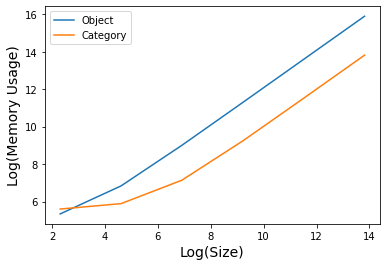

[208, 928, 8128, 80128, 800128, 8000128]
[270, 360, 1260, 10260, 100260, 1000260]


In [72]:
np.random.seed(42)

powers = list()

for i in range(1, 7):
    powers.append(10 ** i)

memory_obj = list()
memory_cat = list()


for i in powers:
    ser = pd.Series(np.random.choice(["Azul", "Amarelo", "Vermelho"], size = i))
    memory_obj.append(ser.memory_usage())
    
    ser_cat = ser.astype('category')
    memory_cat.append(ser_cat.memory_usage())
    
plt.plot(np.log(powers), np.log(memory_obj), label = "Object")
plt.plot(np.log(powers), np.log(memory_cat), label = "Category")

plt.xlabel("Log(Size)", size = 14)
plt.ylabel("Log(Memory Usage)", size = 14)

plt.legend()

plt.show()  

print(memory_obj)
print(memory_cat)

In [73]:
# analogia de série como dicionários

# um dicionário
population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}

# uma série
population = pd.Series(population_dict)
population['California']
population['California':'New York'] # séries permitem indexação de intervalos como fatias

California    38332521
Texas         26448193
New York      19651127
dtype: int64

In [74]:
# pd.Series(dados, index = índices)

pd.Series([2, 4, 6]) # uma lista
pd.Series(5, index = [100, 200, 300]) # um escalar repetido
pd.Series({2:'a', 1:'b', 3:'c'}) # um dicionário
pd.Series({2:'a', 1:'b', 3:'c'}, index = [3, 2])

3    c
2    a
dtype: object

In [75]:
# DataFrames

# a new dictionary
area_dict = {'California': 423967, 'Texas': 695662, 'New York': 141297, 'Florida': 170312, 'Illinois': 149995}

# a dictionary is assigned to a pd.Series
area = pd.Series(area_dict)
area

pd.DataFrame(population, columns = ['population']) # From a single Series object

data = [{'a': i, 'b': 2 * i} for i in range(3)] # From a list of dicts
pd.DataFrame(data)

pd.DataFrame([{'a': 1, 'b': 2}, {'b': 3, 'c': 4}])

pd.DataFrame({'population': population, 'area': area}) # From a dictionary of Series objects

pd.DataFrame(np.random.rand(3, 2), columns = ['foo', 'bar'], index = ['a', 'b', 'c']) # From a two-dimensional NumPy array


A = np.zeros(3, dtype = [('A', 'i8'), ('B', 'f8')]) # From a NumPy structured array
pd.DataFrame(A)


,A,B
0,0,0.0
1,0,0.0
2,0,0.0


In [76]:
# criando um dataframe do stratch
countries = ["Belgium", "Israel", "Czechia", "Panama", "Kuwait",
             "United States", "Peru", "Chile", "Argentina", "Spain"]

cases = [39_166, 35_572, 33_103, 32_300, 30_957,
        28_414, 28_213, 27_455, 26_593, 26_554]

covid19 = pd.DataFrame(cases, index = countries, columns = ["cases"])
covid19

,cases
Belgium,39166
Israel,35572
Czechia,33103
Panama,32300
Kuwait,30957
United States,28414
Peru,28213
Chile,27455
Argentina,26593
Spain,26554


In [77]:
header = [i + str(j) for i in list("abcdefghijklmnopq") for j in range(1, 11)]
header = header[:169]
df = pd.read_csv("16PF/data.csv", sep = " ", encoding = "utf-8", header = None)
x = pd.DataFrame(df[0].str.split("\t").to_list(), columns = header)
x.head(5)

,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,...,p10,q1,q2,q3,q4,q5,q6,q7,q8,q9
0,1,4,2,3,3,2,3,4,4,3,...,1,2,5,2,17,1,92,US,6,914
1,4,3,4,3,4,4,4,4,2,2,...,3,2,2,2,37,1,100,US,1,891
2,3,4,4,4,4,4,4,3,2,2,...,2,3,3,3,31,1,80,US,6,903
3,4,5,4,4,4,3,3,2,2,2,...,2,3,4,4,32,1,93,US,1,806
4,4,0,4,4,4,3,5,1,2,4,...,4,2,3,2,46,2,87,NZ,1,1826


In [78]:
display(x)

,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,...,p10,q1,q2,q3,q4,q5,q6,q7,q8,q9
0,1,4,2,3,3,2,3,4,4,3,...,1,2,5,2,17,1,92,US,6,914
1,4,3,4,3,4,4,4,4,2,2,...,3,2,2,2,37,1,100,US,1,891
2,3,4,4,4,4,4,4,3,2,2,...,2,3,3,3,31,1,80,US,6,903
3,4,5,4,4,4,3,3,2,2,2,...,2,3,4,4,32,1,93,US,1,806
4,4,0,4,4,4,3,5,1,2,4,...,4,2,3,2,46,2,87,NZ,1,1826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49154,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,24,1,100,IN,1,274
49155,4,5,4,4,4,3,5,3,2,3,...,3,4,4,4,22,1,50,ZA,1,584
49156,2,4,2,3,3,3,4,4,2,4,...,3,4,5,4,29,2,85,BE,6,932
49157,4,4,4,4,4,4,4,4,1,3,...,2,4,5,4,48,1,95,CZ,2,1212


In [79]:
x.tail(5) 

,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,...,p10,q1,q2,q3,q4,q5,q6,q7,q8,q9
49154,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,24,1,100,IN,1,274
49155,4,5,4,4,4,3,5,3,2,3,...,3,4,4,4,22,1,50,ZA,1,584
49156,2,4,2,3,3,3,4,4,2,4,...,3,4,5,4,29,2,85,BE,6,932
49157,4,4,4,4,4,4,4,4,1,3,...,2,4,5,4,48,1,95,CZ,2,1212
49158,4,5,4,5,5,4,5,3,1,2,...,1,4,4,5,18,2,99,GB,2,950


In [80]:
x.sample(n = 5, random_state = 42)

,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,...,p10,q1,q2,q3,q4,q5,q6,q7,q8,q9
15000,5,5,5,5,4,4,5,1,1,1,...,2,4,4,4,30,2,85,CA,6,34930
33337,5,5,5,5,5,5,5,4,1,3,...,2,5,4,4,18,1,90,CA,1,492
27989,4,4,3,4,4,4,4,4,2,2,...,3,2,4,4,18,1,60,US,6,706
19120,4,4,4,4,4,3,5,4,1,2,...,2,4,3,2,32,1,75,IE,1,872
8344,4,5,5,4,5,4,4,3,2,2,...,1,4,4,4,25,2,90,US,6,615


In [81]:
x["q8"]

0        6
1        1
2        6
3        1
4        1
        ..
49154    1
49155    1
49156    6
49157    2
49158    2
Name: q8, Length: 49159, dtype: object

In [82]:
x[["a1", "b2", "c3"]]

,a1,b2,c3
0,1,4,1
1,4,4,1
2,3,4,2
3,4,2,4
4,4,4,2
...,...,...,...
49154,1,1,1
49155,4,4,5
49156,2,4,2
49157,4,3,2


In [83]:
x.iloc[0]

a1      1
a2      4
a3      2
a4      3
a5      3
     ... 
q5      1
q6     92
q7     US
q8      6
q9    914
Name: 0, Length: 169, dtype: object

In [84]:
# linhas 1 a 4 e colunas específicas usando LOC
x.loc[1:4, ["a2", "c7"]]

,a2,c7
1,3,3
2,4,3
3,5,4
4,0,3


In [85]:
# busca coluna. caso não encontre, cria nova coluna
x.reindex(columns = ["a1", "paçoca"])

,a1,paçoca
0,1,NaN
1,4,NaN
2,3,NaN
3,4,NaN
4,4,NaN
...,...,...
49154,1,NaN
49155,4,NaN
49156,2,NaN
49157,4,NaN


In [86]:
# Filtro
x[x["a1"] == "4"]

,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,...,p10,q1,q2,q3,q4,q5,q6,q7,q8,q9
1,4,3,4,3,4,4,4,4,2,2,...,3,2,2,2,37,1,100,US,1,891
3,4,5,4,4,4,3,3,2,2,2,...,2,3,4,4,32,1,93,US,1,806
4,4,0,4,4,4,3,5,1,2,4,...,4,2,3,2,46,2,87,NZ,1,1826
6,4,2,5,4,2,4,4,2,1,3,...,4,2,3,4,35,1,80,US,1,717
7,4,5,4,4,4,4,5,2,2,2,...,1,4,4,3,61,2,100,US,1,567
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49152,4,4,4,4,4,4,4,2,2,2,...,2,4,4,4,24,2,95,IN,2,705
49153,4,4,5,4,3,3,5,3,1,2,...,2,4,2,4,19,2,15,US,1,361
49155,4,5,4,4,4,3,5,3,2,3,...,3,4,4,4,22,1,50,ZA,1,584
49157,4,4,4,4,4,4,4,4,1,3,...,2,4,5,4,48,1,95,CZ,2,1212


In [87]:
# sort_values
x.sort_values(by = ["a1", "a2", "a3"], ascending = [True, False, True])

,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,...,p10,q1,q2,q3,q4,q5,q6,q7,q8,q9
42540,0,5,1,5,5,5,5,2,2,2,...,4,2,4,2,18,2,100,US,1,618
8724,0,5,2,4,4,4,4,3,1,2,...,2,5,4,4,18,1,99,US,6,969
10824,0,5,2,2,3,4,4,3,3,1,...,3,3,4,3,19,2,70,IN,1,1575
20686,0,5,2,5,5,5,5,2,1,3,...,3,4,4,3,19,1,98,US,6,425
43992,0,5,2,4,4,5,5,5,2,1,...,2,2,5,5,18,2,95,US,6,1075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39922,5,0,5,5,4,4,5,2,1,2,...,2,4,4,4,17,2,99,US,6,650
40148,5,0,5,4,4,3,5,3,3,4,...,1,2,4,4,17,1,50,US,6,818
42430,5,0,5,4,4,4,4,0,1,4,...,5,4,3,3,16,2,80,US,1,867
42714,5,0,5,4,5,5,5,2,2,3,...,4,2,2,5,22,2,88,US,1,415


In [88]:
# The Pandas Index Object

ind = pd.Index([2, 3, 5, 7, 11])
ind

indA = pd.Index([1, 3, 5, 7, 9])
indB = pd.Index([2, 3, 5, 7, 11])

indA & indB # intersection
indA | indB # union
indA ^ indB # symmetric difference

C:\Users\User\AppData\Local\Temp/ipykernel_6192/3324975614.py:9: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  indA & indB # intersection
C:\Users\User\AppData\Local\Temp/ipykernel_6192/3324975614.py:10: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  indA | indB # union
C:\Users\User\AppData\Local\Temp/ipykernel_6192/3324975614.py:11: FutureWarning: Index.__xor__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__xor__.  Use index.symmetric_difference(other) instead
  indA ^ indB # symmetric difference


Int64Index([1, 2, 9, 11], dtype='int64')

In [89]:
# Data Indexing and Selection

# Data Selection in Series

data = pd.Series([0.25, 0.5, 0.75, 1.0], index=['a', 'b', 'c', 'd'])

'a' in data
data.keys()
list(data.items())

data['e'] = 1.25
data

# slicing by explicit index
data['a':'c'] # explicit index includes the final index

# slicing by implicit integer index
data[0:2] # implicit index excludes the final index

# masking
data[(data > 0.3) & (data < 0.8)]

# fancy indexing
data[['a', 'e']]

a    0.25
e    1.25
dtype: float64

In [90]:
# Indexers: loc, iloc, and ix

data = pd.Series(['a', 'b', 'c'], index = [1, 3, 5])
data.loc[1] # loc: indexing with explicit index
data.loc[1:3] # loc: slicing with explicit indices

data.iloc[1] # iloc: indexing with implicit Python-style index
data.iloc[1:3] # iloc: slicing with implicit Python-style index


3    b
5    c
dtype: object

In [91]:
# Data Selection in DataFrame

area = pd.Series({'California': 423967, 'Texas': 695662, 'New York': 141297, 'Florida': 170312, 'Illinois': 149995})
pop = pd.Series({'California': 38332521, 'Texas': 26448193, 'New York': 19651127, 'Florida': 19552860, 'Illinois': 12882135})

# create a DataFrame using two Series
data = pd.DataFrame({'area':area, 'pop':pop})

data
data['area']
data.area # attribute-style access

data.area is data['area']

data['density'] = data['pop'] / data['area'] # creating a new column
data
data.values # treating the DataFrame as an array

data.T # transpose DataFrame

,California,Texas,New York,Florida,Illinois
area,4.239670e+05,6.956620e+05,1.412970e+05,1.703120e+05,1.499950e+05
pop,3.833252e+07,2.644819e+07,1.965113e+07,1.955286e+07,1.288214e+07
density,9.041393e+01,3.801874e+01,1.390767e+02,1.148061e+02,8.588376e+01


In [92]:
data.iloc[:3, :2] # iloc: slicing with implicit Python-style index [row, column]

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127


In [93]:
data.loc[:'New York', :'pop'] # loc: slicing with explicit index [row, column]

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127


In [94]:
data.loc[data.density > 100, ['pop', 'density']] # density need to be greater than 100 and columns need to be pop and density

,pop,density
New York,19651127,139.076746
Florida,19552860,114.806121


In [95]:
data.iloc[0, 2] = 90 # assignment of value 90 to row 0, column 2 (implicitly index)
data

,area,pop,density
California,423967,38332521,90.000000
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [96]:
# Additional indexing conventions
data['Florida':'Illinois'] # indexing refers to columns
data[1:3] # slicing refers to rows
data[data.density > 100] # masking is a row-wise operation

,area,pop,density
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121


In [97]:
import pandas as pd

area = pd.Series({'Alaska': 1723337, 'Texas': 695662, 'California': 423967}, name='area')
population = pd.Series({'California': 38332521, 'Texas': 26448193, 'New York': 19651127}, name='population')
population / area

A = pd.Series([2, 4, 6], index=[0, 1, 2])
B = pd.Series([1, 3, 5], index=[1, 2, 3])
A + B

A.add(B, fill_value = 0) # equivalent to A + B, but it permits to specify a value to fill missing cases


0    2.0
1    5.0
2    9.0
3    5.0
dtype: float64

In [98]:
# Handling Missing Data

# None: Pythonic missing data

import numpy as np
import pandas as pd

vals1 = np.array([1, None, 3, 4])
vals1

vals2 = np.array([1, np.nan, 3, 4])
vals2

np.nansum(vals2), np.nanmin(vals2), np.nanmax(vals2)

(8.0, 1.0, 4.0)

In [99]:
# Operating on Null Values

data = pd.Series([1, np.nan, 'hello', None])

# isnull(): Generate a Boolean mask indicating missing values

data.isnull()
    
# notnull(): Opposite of isnull()

data[data.notnull()]

# dropna(): Return a filtered version of the data

data.dropna()

df = pd.DataFrame([[1, np.nan, 2],
                   [2, 3, 5],
                   [np.nan, 4, 6]])

df.dropna() # default: drop rows with any null value
df.dropna(axis = 'columns') # drop columns with any null value

df[3] = np.nan
df.dropna(axis = 'columns', how = 'all') # how: default is any; all drop a column with all null values

df.dropna(axis = 'rows', thresh = 3) # a minimum number of non-null values for the column/row to be kept

# fillna(): Return a copy of the data with missing values filled or imputed

data = pd.Series([1, np.nan, 2, None, 3], index = list('abcde'))
data.fillna(0)

# forward-fill
data.fillna(method = 'ffill')

# back-fill
data.fillna(method = 'bfill')

df.fillna(method = 'ffill', axis = 1)


,0,1,2,3
0,1.0,1.0,2.0,2.0
1,2.0,3.0,5.0,5.0
2,NaN,4.0,6.0,6.0


In [100]:
# Hierarchical Indexing

# A Multiply Indexed Series

index = [('California', 2000), ('California', 2010), ('New York', 2000), ('New York', 2010), ('Texas', 2000), ('Texas', 2010)]
populations = [33871648, 37253956, 18976457, 19378102, 20851820, 25145561]
pop = pd.Series(populations, index=index)

index = pd.MultiIndex.from_tuples(index)
index

pop = pop.reindex(index)
pop
pop[:, 2010]

California    37253956
New York      19378102
Texas         25145561
dtype: int64

In [101]:
# MultiIndex as extra dimension

pop_df = pop.unstack()
pop_df
pop_df.stack()

pop_df = pd.DataFrame({'total': pop, 'under18': [9267089, 9284094, 4687374, 4318033, 5906301, 6879014]})
pop_df

f_u18 = pop_df['under18'] / pop_df['total']
f_u18.unstack()

,2000,2010
California,0.273594,0.249211
New York,0.247010,0.222831
Texas,0.283251,0.273568


In [102]:
# Methods of MultiIndex Creation

df = pd.DataFrame(np.random.rand(4, 2), index = [['a', 'a', 'b', 'b'], [1, 2, 1, 2]], columns = ['data1', 'data2'])
df

data = {('California', 2000): 33871648,
        ('California', 2010): 37253956,
        ('Texas', 2000): 20851820,
        ('Texas', 2010): 25145561,
        ('New York', 2000): 18976457,
        ('New York', 2010): 19378102}
pd.Series(data)

pd.MultiIndex.from_arrays([['a', 'a', 'b', 'b'], [1, 2, 1, 2]])
pd.MultiIndex.from_tuples([('a', 1), ('a', 2), ('b', 1), ('b', 2)])
pd.MultiIndex.from_product([['a', 'b'], [1, 2]])

pop.index.names = ['state', 'year']
pop

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [103]:
# hierarchical indices and columns
index = pd.MultiIndex.from_product([[2013, 2014], [1, 2]], names = ['year', 'visit'])
columns = pd.MultiIndex.from_product([['Bob', 'Guido', 'Sue'], ['HR', 'Temp']], names = ['subject', 'type'])

# mock some data
data = np.round(np.random.randn(4, 6), 1)
data[:, ::2] *= 10
data += 37
data

# create the DataFrame
health_data = pd.DataFrame(data, index=index, columns=columns)
health_data
health_data['Guido']

type          HR  Temp
year visit            
2013 1      49.0  39.1
     2      27.0  37.0
2014 1      31.0  37.4
     2      38.0  38.2

In [104]:
# Indexing and Slicing a MultiIndex

pop['California', 2000] # multiIndex
pop['California'] # partial index
pop.loc['California':'New York'] # partial slicing
pop[:, 2000] # partial indexing on lower levels
pop[pop > 22000000] # indexing and selecting based on Boolean masking
pop[['California', 'Texas']] # selection based on Fancy indexing

state       year
California  2000    33871648
            2010    37253956
Texas       2000    20851820
            2010    25145561
dtype: int64

In [105]:
# Rearranging Multi-Indices

index = pd.MultiIndex.from_product([['a', 'c', 'b'], [1, 2]]) # indices are not lexicographically sorted
data = pd.Series(np.random.rand(6), index = index)
data.index.names = ['char', 'int']
data

try:
    data['a':'b'] # slicing doesn't work with non-sorted indices
except KeyError as e:
    print(type(e))
    print(e)
    
data = data.sort_index() # sorting indices
data

data['a':'b'] # now partial slicing does it work

<class 'pandas.errors.UnsortedIndexError'>
'Key length (1) was greater than MultiIndex lexsort depth (0)'


char  int
a     1      0.415885
      2      0.585195
b     1      0.621031
      2      0.294690
dtype: float64

In [108]:
pop
pop.unstack(level = 0)
pop.unstack(level = 1)
pop.unstack().stack()

pop_flat = pop.reset_index(name = 'population') # transform indices in column values
pop_flat

pop_flat.set_index(['level_0', 'level_1']) # return to the previous format



KeyError: "None of ['level_0', 'level_1'] are in the columns"

In [109]:
# Data Aggregations on Multi-Indices

health_data
data_mean = health_data.mean(level = 'year') # year-level mean
data_mean

data_mean.mean(axis = 1, level = 'type') # column axis, year-level mean

C:\Users\User\AppData\Local\Temp/ipykernel_6192/1699252674.py:4: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  data_mean = health_data.mean(level = 'year') # year-level mean
C:\Users\User\AppData\Local\Temp/ipykernel_6192/1699252674.py:7: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  data_mean.mean(axis = 1, level = 'type') # column axis, year-level mean


type,HR,Temp
year,,
2013,32.333333,37.716667
2014,32.000000,37.166667


In [110]:
# Combining Datasets: Concat and Append

def make_df(cols, ind):
    """Quickly make a DataFrame"""
    data = {c: [str(c) + str(i) for i in ind] for c in cols}
    return pd.DataFrame(data, ind)

# example DataFrame
make_df('ABC', range(3))

,A,B,C
0,A0,B0,C0
1,A1,B1,C1
2,A2,B2,C2


In [111]:
# Recall: Concatenation of NumPy Arrays

x = [1, 2, 3]
y = [4, 5, 6]
z = [7, 8, 9]
np.concatenate([x, y, z])

x = [[1, 2],
     [3, 4]]
np.concatenate([x, x], axis = 1)

array([[1, 2, 1, 2],
       [3, 4, 3, 4]])

In [112]:
# Simple Concatenation with pd.concat

# Signature in Pandas v0.18
'''pd.concat(objs, axis=0, join='outer', join_axes=None, ignore_index=False,
          keys=None, levels=None, names=None, verify_integrity=False,
          copy=True)'''

"pd.concat(objs, axis=0, join='outer', join_axes=None, ignore_index=False,\n          keys=None, levels=None, names=None, verify_integrity=False,\n          copy=True)"

In [113]:
ser1 = pd.Series(['A', 'B', 'C'], index=[1, 2, 3])
ser2 = pd.Series(['D', 'E', 'F'], index=[4, 5, 6])
pd.concat([ser1, ser2])

1    A
2    B
3    C
4    D
5    E
6    F
dtype: object

In [114]:
df1 = make_df('AB', [1, 2])
df2 = make_df('AB', [3, 4])
print(df1)
print(df2)
print(pd.concat([df1, df2])) # row-wise concatenation

df3 = make_df('AB', [0, 1])
df4 = make_df('CD', [0, 1])
print(df3); print(df4); print(pd.concat([df3, df4], axis = 1)) # column-wise concatenation

    A   B
1  A1  B1
2  A2  B2
    A   B
3  A3  B3
4  A4  B4
    A   B
1  A1  B1
2  A2  B2
3  A3  B3
4  A4  B4
    A   B
0  A0  B0
1  A1  B1
    C   D
0  C0  D0
1  C1  D1
    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1


In [115]:
x = make_df('AB', [0, 1])

y = make_df('AB', [2, 3])

y.index = x.index # make duplicate indices!
print(x); print(y); print(pd.concat([x, y]))

    A   B
0  A0  B0
1  A1  B1
    A   B
0  A2  B2
1  A3  B3
    A   B
0  A0  B0
1  A1  B1
0  A2  B2
1  A3  B3


In [116]:
# testing if there are indices with overlapping values
try:
    pd.concat([x, y], verify_integrity = True)
except ValueError as e:
    print("ValueError:", e)
    
# ignoring the index
print(x); print(y); print(pd.concat([x, y], ignore_index = True))

# adding multiIndex keys
print(x); print(y); print(pd.concat([x, y], keys = ['x', 'y']))

ValueError: Indexes have overlapping values: Int64Index([0, 1], dtype='int64')
    A   B
0  A0  B0
1  A1  B1
    A   B
0  A2  B2
1  A3  B3
    A   B
0  A0  B0
1  A1  B1
2  A2  B2
3  A3  B3
    A   B
0  A0  B0
1  A1  B1
    A   B
0  A2  B2
1  A3  B3
      A   B
x 0  A0  B0
  1  A1  B1
y 0  A2  B2
  1  A3  B3


In [117]:
# Concatenation with joins

df5 = make_df('ABC', [1, 2])
df6 = make_df('BCD', [3, 4])
print(df5)
print(df6)

# By default, the join is a union of the input columns (join = 'outer'), but we can change this to
# an intersection of the columns using join='inner'
print(pd.concat([df5, df6], join = 'inner')) 

    A   B   C
1  A1  B1  C1
2  A2  B2  C2
    B   C   D
3  B3  C3  D3
4  B4  C4  D4
    B   C
1  B1  C1
2  B2  C2
3  B3  C3
4  B4  C4


In [118]:
print(df1.append(df2))

    A   B
1  A1  B1
2  A2  B2
3  A3  B3
4  A4  B4


In [119]:
# Combining Datasets: Merge and Join

df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'hire_date': [2004, 2008, 2012, 2014]})
print(df1); print(df2)

# One-to-one joins

df3 = pd.merge(df1, df2)
df3



  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
  employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014


,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


In [120]:
# Many-to-one joins

df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'], 'supervisor': ['Carly', 'Guido', 'Steve']})
print(df3); print(df4); print(pd.merge(df3, df4))

  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014
         group supervisor
0   Accounting      Carly
1  Engineering      Guido
2           HR      Steve
  employee        group  hire_date supervisor
0      Bob   Accounting       2008      Carly
1     Jake  Engineering       2012      Guido
2     Lisa  Engineering       2004      Guido
3      Sue           HR       2014      Steve


In [121]:
# Many-to-many joins

df5 = pd.DataFrame({'group': ['Accounting', 'Accounting', 'Engineering', 'Engineering', 'HR', 'HR'],
                    'skills': ['math', 'spreadsheets', 'coding', 'linux', 'spreadsheets', 'organization']})
print(df1); print(df5); print(pd.merge(df1, df5))



  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
         group        skills
0   Accounting          math
1   Accounting  spreadsheets
2  Engineering        coding
3  Engineering         linux
4           HR  spreadsheets
5           HR  organization
  employee        group        skills
0      Bob   Accounting          math
1      Bob   Accounting  spreadsheets
2     Jake  Engineering        coding
3     Jake  Engineering         linux
4     Lisa  Engineering        coding
5     Lisa  Engineering         linux
6      Sue           HR  spreadsheets
7      Sue           HR  organization


In [122]:
# Specification of the Merge Key

print(df1); print(df2); print(pd.merge(df1, df2, on = 'employee'))

df3 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'], 'salary': [70000, 80000, 120000, 90000]})
print(df1); print(df3);
print(pd.merge(df1, df3, left_on = "employee", right_on = "name"))

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
  employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014
  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014
  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
   name  salary
0   Bob   70000
1  Jake   80000
2  Lisa  120000
3   Sue   90000
  employee        group  name  salary
0      Bob   Accounting   Bob   70000
1     Jake  Engineering  Jake   80000
2     Lisa  Engineering  Lisa  120000
3      Sue           HR   Sue   90000


In [123]:
# Specifying Set Arithmetic for Joins

df6 = pd.DataFrame({'name': ['Peter', 'Paul', 'Mary'],
                    'food': ['fish', 'beans', 'bread']},
                   columns=['name', 'food'])
df7 = pd.DataFrame({'name': ['Mary', 'Joseph'],
                    'drink': ['wine', 'beer']},
                   columns=['name', 'drink'])
print(df6); print(df7); print(pd.merge(df6, df7))

    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread
     name drink
0    Mary  wine
1  Joseph  beer
   name   food drink
0  Mary  bread  wine


In [124]:
# Overlapping Column Names: The suffixes Keyword

df8 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'], 'rank': [1, 2, 3, 4]})
df9 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'], 'rank': [3, 1, 4, 2]})
print(df8); print(df9); print(pd.merge(df8, df9, on = "name"))

   name  rank
0   Bob     1
1  Jake     2
2  Lisa     3
3   Sue     4
   name  rank
0   Bob     3
1  Jake     1
2  Lisa     4
3   Sue     2
   name  rank_x  rank_y
0   Bob       1       3
1  Jake       2       1
2  Lisa       3       4
3   Sue       4       2


In [125]:
# Example: US States Data

# Following are shell commands to download the data

!curl -O https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-population.csv
!curl -O https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-areas.csv
!curl -O https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-abbrevs.csv
    
pop = pd.read_csv('state-population.csv')
areas = pd.read_csv('state-areas.csv')
abbrevs = pd.read_csv('state-abbrevs.csv')

print(pop.head()); print(areas.head()); print(abbrevs.head())

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
100 57935  100 57935    0     0  36311      0  0:00:01  0:00:01 --:--:-- 37377
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100   835  100   835    0     0   1674      0 --:--:-- --:--:-- --:--:--  1676


  state/region     ages  year  population
0           AL  under18  2012   1117489.0
1           AL    total  2012   4817528.0
2           AL  under18  2010   1130966.0
3           AL    total  2010   4785570.0
4           AL  under18  2011   1125763.0
        state  area (sq. mi)
0     Alabama          52423
1      Alaska         656425
2     Arizona         114006
3    Arkansas          53182
4  California         163707
        state abbreviation
0     Alabama           AL
1      Alaska           AK
2     Arizona           AZ
3    Arkansas           AR
4  California           CA


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100   872  100   872    0     0   1629      0 --:--:-- --:--:-- --:--:--  1632
100   872  100   872    0     0   1627      0 --:--:-- --:--:-- --:--:--  1629


In [126]:
merged = pd.merge(pop, abbrevs, how = 'outer', left_on='state/region', right_on='abbreviation')
merged = merged.drop('abbreviation', 1) # drop duplicate info
merged.head()

merged.isnull().any()

merged[merged['population'].isnull()].head() # let's figure out which population info is null
merged.loc[merged['state'].isnull(), 'state/region'].unique()

merged.loc[merged['state/region'] == 'PR', 'state'] = 'Puerto Rico'
merged.loc[merged['state/region'] == 'USA', 'state'] = 'United States'
merged.isnull().any()

final = pd.merge(merged, areas, on='state', how='left')
final.head()
final.isnull().any()

final['state'][final['area (sq. mi)'].isnull()].unique()

final.dropna(inplace=True)
final.head()

data2010 = final.query("year == 2010 & ages == 'total'")
data2010.head()

data2010.set_index('state', inplace=True)
density = data2010['population'] / data2010['area (sq. mi)']

density.sort_values(ascending=False, inplace=True)
density.head()
density.tail()

C:\Users\User\AppData\Local\Temp/ipykernel_6192/1745417167.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  merged = merged.drop('abbreviation', 1) # drop duplicate info


state
South Dakota    10.583512
North Dakota     9.537565
Montana          6.736171
Wyoming          5.768079
Alaska           1.087509
dtype: float64

In [127]:
# Aggregation and Grouping

# Planets Data

import seaborn as sns

planets = sns.load_dataset('planets')
planets.shape
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [128]:
# Simple Aggregation in Pandas

rng = np.random.RandomState(42)
ser = pd.Series(rng.rand(5))
ser
ser.sum()
ser.mean()

df = pd.DataFrame({'A': rng.rand(5),
                   'B': rng.rand(5)})

df.mean()
df.mean(axis = 'columns')

planets.dropna().describe()

,number,orbital_period,mass,distance,year
count,498.00000,498.000000,498.000000,498.000000,498.000000
mean,1.73494,835.778671,2.509320,52.068213,2007.377510
std,1.17572,1469.128259,3.636274,46.596041,4.167284
min,1.00000,1.328300,0.003600,1.350000,1989.000000
25%,1.00000,38.272250,0.212500,24.497500,2005.000000
50%,1.00000,357.000000,1.245000,39.940000,2009.000000
75%,2.00000,999.600000,2.867500,59.332500,2011.000000
max,6.00000,17337.500000,25.000000,354.000000,2014.000000


In [129]:
# GroupBy: Split, Apply, Combine

df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data': range(6)}, columns = ['key', 'data'])
df.groupby('key').sum()
planets.groupby('method')['orbital_period'].median() # group by method, it returns median orbital periods

for (method, group) in planets.groupby('method'):
    print("{0:30s} shape={1}".format(method, group.shape))
    
planets.groupby('method')['year'].describe().unstack()

Astrometry                     shape=(2, 6)
Eclipse Timing Variations      shape=(9, 6)
Imaging                        shape=(38, 6)
Microlensing                   shape=(23, 6)
Orbital Brightness Modulation  shape=(3, 6)
Pulsar Timing                  shape=(5, 6)
Pulsation Timing Variations    shape=(1, 6)
Radial Velocity                shape=(553, 6)
Transit                        shape=(397, 6)
Transit Timing Variations      shape=(4, 6)


       method                       
count  Astrometry                          2.0
       Eclipse Timing Variations           9.0
       Imaging                            38.0
       Microlensing                       23.0
       Orbital Brightness Modulation       3.0
                                         ...  
max    Pulsar Timing                    2011.0
       Pulsation Timing Variations      2007.0
       Radial Velocity                  2014.0
       Transit                          2014.0
       Transit Timing Variations        2014.0
Length: 80, dtype: float64

In [130]:
rng = np.random.RandomState(0)
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'], 
                   'data1': range(6), 
                   'data2': rng.randint(0, 10, 6)},
                  columns = ['key', 'data1', 'data2'])
df

df.groupby('key').aggregate(['min', np.median, max]) # group by key, it returns min, median, and max

df.groupby('key').aggregate({'data1': 'min', 'data2': 'max'}) # group by key, return min and max for data1 and data2, respectively

,data1,data2
key,,
A,0,5
B,1,7
C,2,9


In [131]:
def filter_func(x):
    '''We might want to keep all groups in which the standard deviation is larger than some critical value'''
    return x['data2'].std() > 4

print(df); print(df.groupby('key').std());
print(df.groupby('key').filter(filter_func))

  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9
       data1     data2
key                   
A    2.12132  1.414214
B    2.12132  4.949747
C    2.12132  4.242641
  key  data1  data2
1   B      1      0
2   C      2      3
4   B      4      7
5   C      5      9


In [132]:
# centering the data by subtracting the group-wise mean
df.groupby('key').transform(lambda x: x - x.mean())

,data1,data2
0,-1.5,1.0
1,-1.5,-3.5
2,-1.5,-3.0
3,1.5,-1.0
4,1.5,3.5
5,1.5,3.0


In [133]:
def norm_by_data2(x):
    # x is a DataFrame of group values
    x['data1'] /= x['data2'].sum()
    return x

print(df); print(df.groupby('key').apply(norm_by_data2)) # apply(): apply an arbitrary function to the group results



  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9
  key     data1  data2
0   A  0.000000      5
1   B  0.142857      0
2   C  0.166667      3
3   A  0.375000      3
4   B  0.571429      7
5   C  0.416667      9


In [134]:
L = [0, 1, 0, 1, 2, 0] # L is an index providing the grouping keys
print(df); print(df.groupby(L).sum())

print(df); print(df.groupby(df['key']).sum())

  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9
   data1  data2
0      7     17
1      4      3
2      4      7
  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9
     data1  data2
key              
A        3      8
B        5      7
C        7     12


In [135]:
df2 = df.set_index('key')
mapping = {'A': 'vowel', 'B': 'consonant', 'C': 'consonant'}
print(df2); print(df2.groupby(mapping).sum())

print(df2); print(df2.groupby(str.lower).mean())

df2.groupby([str.lower, mapping]).mean()

     data1  data2
key              
A        0      5
B        1      0
C        2      3
A        3      3
B        4      7
C        5      9
           data1  data2
key                    
consonant     12     19
vowel          3      8
     data1  data2
key              
A        0      5
B        1      0
C        2      3
A        3      3
B        4      7
C        5      9
     data1  data2
key              
a      1.5    4.0
b      2.5    3.5
c      3.5    6.0


,,data1,data2
key,key,,
a,vowel,1.5,4.0
b,consonant,2.5,3.5
c,consonant,3.5,6.0


In [136]:
decade = 10 * (planets['year'] // 10)
decade = decade.astype(str) + 's'
decade.name = 'decade'
planets.groupby(['method', decade])['number'].sum().unstack().fillna(0)

decade,1980s,1990s,2000s,2010s
method,,,,
Astrometry,0.0,0.0,0.0,2.0
Eclipse Timing Variations,0.0,0.0,5.0,10.0
Imaging,0.0,0.0,29.0,21.0
Microlensing,0.0,0.0,12.0,15.0
Orbital Brightness Modulation,0.0,0.0,0.0,5.0
Pulsar Timing,0.0,9.0,1.0,1.0
Pulsation Timing Variations,0.0,0.0,1.0,0.0
Radial Velocity,1.0,52.0,475.0,424.0
Transit,0.0,0.0,64.0,712.0


In [137]:
# Pivot Tables

import numpy as np
import pandas as pd
import seaborn as sns
titanic = sns.load_dataset('titanic')

titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [138]:
# Pivot Tables by Hand

# compute average survivors grouped by sex
titanic.groupby('sex')[['survived']].mean()

# compute average survivors grouped by both sex and class
# and then unstack the hierarchical index to reveal the hidden multidimensionality
titanic.groupby(['sex', 'class'])['survived'].aggregate('mean').unstack()


class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [139]:
# Pivot Table Syntax

# survived = average variable, index = row values, class = column values
titanic.pivot_table('survived', index = 'sex', columns = 'class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [140]:
age = pd.cut(titanic['age'], [0, 18, 80]) # bin age: 0 to 18 and 18 to 80
titanic.pivot_table('survived', ['sex', age], 'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [141]:
fare = pd.qcut(titanic['fare'], 2) # bin fare in to quantiles (median split?)
titanic.pivot_table('survived', ['sex', age], [fare, 'class'])

fare            (-0.001, 14.454]                     (14.454, 512.329]  \
class                      First    Second     Third             First   
sex    age                                                               
female (0, 18]               NaN  1.000000  0.714286          0.909091   
       (18, 80]              NaN  0.880000  0.444444          0.972973   
male   (0, 18]               NaN  0.000000  0.260870          0.800000   
       (18, 80]              0.0  0.098039  0.125000          0.391304   

fare                                 
class              Second     Third  
sex    age                           
female (0, 18]   1.000000  0.318182  
       (18, 80]  0.914286  0.391304  
male   (0, 18]   0.818182  0.178571  
       (18, 80]  0.030303  0.192308

In [142]:
# call signature as of Pandas 0.18
'''
DataFrame.pivot_table(data, values=None, index=None, columns=None,
aggfunc='mean', fill_value=None, margins=False,
dropna=True, margins_name='All')
'''

titanic.pivot_table(index = 'sex', columns='class', aggfunc = {'survived':sum, 'fare':'mean'})
titanic.pivot_table('survived', index = 'sex', columns = 'class', margins = True)

class,First,Second,Third,All
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


In [143]:
# Example: Birthrate Data

import numpy as np
import pandas as pd

# shell command to download the data
!curl -O https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv
births = pd.read_csv('births.csv')
births.head()

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0  258k    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
100  258k  100  258k    0     0   191k      0  0:00:01  0:00:01 --:--:--  191k


,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [144]:
births['decade'] = 10 * (births['year'] // 10) # creating a decade column
births.pivot_table('births', index = 'decade', columns = 'gender', aggfunc = 'sum')

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


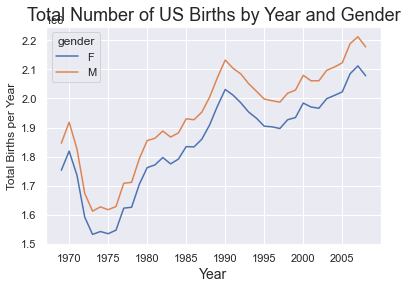

In [145]:
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt

sns.set() # use Seaborn styles
births.pivot_table('births', index = 'year', columns = 'gender', aggfunc = 'sum').plot()
plt.title('Total Number of US Births by Year and Gender', fontsize = 18)
plt.ylabel('Total Births per Year');
plt.xlabel('Year', fontsize = 14)
plt.savefig("Figura 9.jpg", dpi = 600)
plt.show()    

C:\Users\User\AppData\Local\Temp/ipykernel_6192/1145450454.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['','Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])


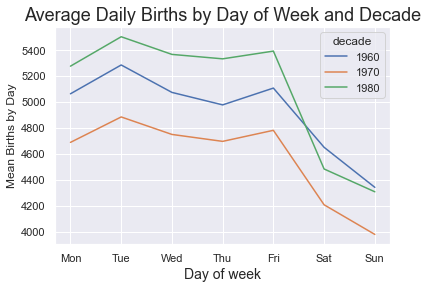

In [146]:
quartiles = np.percentile(births['births'], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

# set 'day' column to integer; it originally was a string due to nulls
births['day'] = births['day'].astype(int)

# create a datetime index from the year, month, day
births.index = pd.to_datetime(10000 * births.year +
                              100 * births.month +
                              births.day, format='%Y%m%d')
births['dayofweek'] = births.index.dayofweek

import matplotlib.pyplot as plt
import matplotlib as mpl

plt.rcParams.update({'font.size': 14})

births.pivot_table('births', index = 'dayofweek',
                   columns = 'decade', aggfunc = 'mean').plot()
plt.gca().set_xticklabels(['','Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.title('Average Daily Births by Day of Week and Decade', fontsize = 18)
plt.ylabel('Mean Births by Day');
plt.xlabel('Day of week', fontsize = 14)
plt.savefig("Figura 10.jpg", dpi = 600, bbox_inches = "tight")
plt.show()  

In [147]:
births_by_date = births.pivot_table('births',
                                    [births.index.month, births.index.day])
births_by_date.head()

births_by_date.index = [pd.datetime(2012, month, day)
                        for (month, day) in births_by_date.index]
births_by_date.head()

C:\Users\User\AppData\Local\Temp/ipykernel_6192/4059600429.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  births_by_date.index = [pd.datetime(2012, month, day)


,births
2012-01-01,4009.225
2012-01-02,4247.400
2012-01-03,4500.900
2012-01-04,4571.350
2012-01-05,4603.625


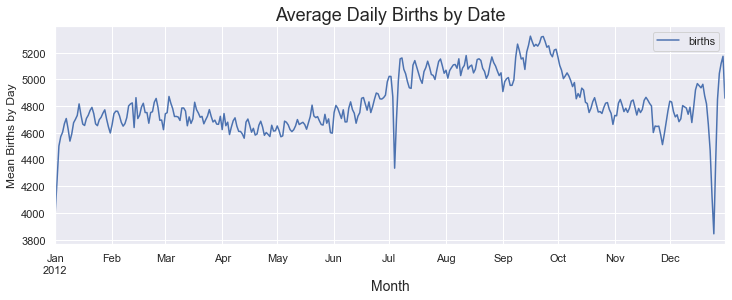

In [148]:
# Plot the results
fig, ax = plt.subplots(figsize = (12, 4))
births_by_date.plot(ax = ax);
plt.title('Average Daily Births by Date', fontsize = 18)
plt.ylabel('Mean Births by Day');
plt.xlabel('Month', fontsize = 14)
plt.savefig("Figura 11.jpg", dpi = 600, bbox_inches = "tight")
plt.show()  


In [149]:
# Vectorized String Operations

data = ['peter', 'Paul', 'MARY', 'gUIDO']
[s.capitalize() for s in data]

# program will break with missing values
# data = ['peter', 'Paul', None, 'MARY', 'gUIDO']
# [s.capitalize() for s in data]

import pandas as pd
names = pd.Series(data)
names

names.str.capitalize()

0    Peter
1     Paul
2     Mary
3    Guido
dtype: object

In [150]:
monte = pd.Series(['Graham Chapman', 'John Cleese', 'Terry Gilliam', 'Eric Idle', 'Terry Jones', 'Michael Palin'])
monte.str.lower()
monte.str.len()
monte.str.startswith('T')
monte.str.split()

# extract the first name from each by asking for a contiguous group of characters at the beginning of each elemen
monte.str.extract('([A-Za-z]+)')

# finding all names that start and end with a consonant, making use of the start-of-string (^) and end-of-string ($) regular
# expression characters
monte.str.findall(r'^[^AEIOU].*[^aeiou]$')

0    [Graham Chapman]
1                  []
2     [Terry Gilliam]
3                  []
4       [Terry Jones]
5     [Michael Palin]
dtype: object

In [151]:
# extract the first three letters of each entry
monte.str[0:3]

# extract the last name of each entry, we can combine split() and get()
monte.str.split().str.get(-1)

full_monte = pd.DataFrame({'name': monte,
                           'info': ['B|C|D', 'B|D', 'A|C', 'B|D', 'B|C',
                                    'B|C|D']})

full_monte

# The get_dummies() routine lets you quickly split out these indicator variables into a DataFrame
full_monte['info'].str.get_dummies('|')

,A,B,C,D
0,0,1,1,1
1,0,1,0,1
2,1,0,1,0
3,0,1,0,1
4,0,1,1,0
5,0,1,1,1


In [152]:
# Working with Time Series

# Dates and Times in Python

from datetime import datetime
datetime(year = 2015, month = 7, day = 4)

from dateutil import parser
date = parser.parse("4th of July, 2015")
date

date.strftime('%A')

import numpy as np
date = np.array('2015-07-04', dtype = np.datetime64)
date

date + np.arange(12) # create a sequences of dates

np.datetime64('2015-07-04')
np.datetime64('2015-07-04 12:00')
np.datetime64('2015-07-04 12:59:59.50', 'ns')

import pandas as pd
date = pd.to_datetime("4th of July, 2015")
date

date.strftime('%A')

date + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
              dtype='datetime64[ns]', freq=None)

In [153]:
# Pandas Time Series: Indexing by Time

index = pd.DatetimeIndex(['2014-07-04', '2014-08-04', '2015-07-04', '2015-08-04'])
data = pd.Series([0, 1, 2, 3], index = index)
data

data['2015']

# Pandas Time Series Data Structures

dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015', '2015-Jul-6', '07-07-2015', '20150708'])
dates

dates.to_period('D')
dates - dates[0]

pd.date_range('2015-07-03', '2015-07-10') # create a date range between a given interval
pd.date_range('2015-07-03', periods = 8)
pd.date_range('2015-07-03', periods = 8, freq = 'H') # freq default is D (day); H (hour) creates a range on an hour basis
pd.period_range('2015-07', periods = 8, freq = 'M') # freq M (month) creates a range on a monthly basis
pd.timedelta_range(0, periods = 10, freq = 'H')

TimedeltaIndex(['0 days 00:00:00', '0 days 01:00:00', '0 days 02:00:00',
                '0 days 03:00:00', '0 days 04:00:00', '0 days 05:00:00',
                '0 days 06:00:00', '0 days 07:00:00', '0 days 08:00:00',
                '0 days 09:00:00'],
               dtype='timedelta64[ns]', freq='H')